Aplicación de proyección de caudales usando metodologías tratadas en la mentoría con el profesor Erick Lopez Ovando

In [ ]:
import pandas as pd
datos = pd.read_csv('Caudales_2.csv')

In [ ]:
datos.shape
#datos.head(10)

(1088, 1)

In [ ]:
datos

,Caudal
0,69.30963
1,59.81791
2,61.95215
3,96.10415
4,253.08719
...,...
1083,27.98657
1084,25.25900
1085,25.18557
1086,33.12600


In [ ]:
serie=datos

In [ ]:
serie.shape

(1088, 1)

In [ ]:
serie

,Caudal
0,69.30963
1,59.81791
2,61.95215
3,96.10415
4,253.08719
...,...
1083,27.98657
1084,25.25900
1085,25.18557
1086,33.12600


In [ ]:
serie.reset_index(drop=True,inplace=True)
serie.columns = ["Caudal"]
serie

,Caudal
0,69.30963
1,59.81791
2,61.95215
3,96.10415
4,253.08719
...,...
1083,27.98657
1084,25.25900
1085,25.18557
1086,33.12600


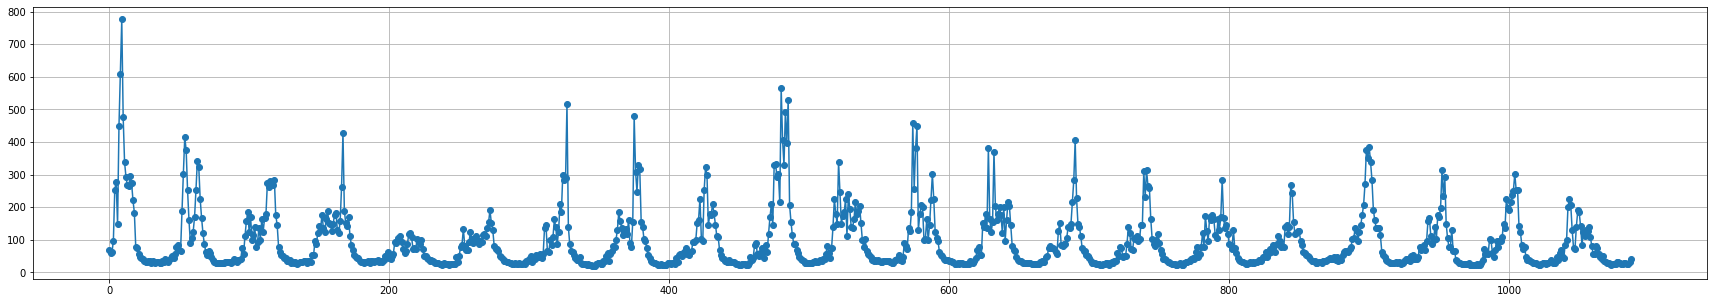

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.plot(serie[0:1088],'o-')
plt.grid(True)

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

serie = serie.astype("float")
print(acf(serie, fft=False, missing="drop"))

ii_tmp = ~serie.Caudal.isna()
print(pacf(serie[ii_tmp]))


[ 1.          0.84477626  0.73173411  0.64196446  0.55970863  0.47851202
  0.38274063  0.32915355  0.26407836  0.19871143  0.13639452  0.07687298
  0.01277914 -0.04987404 -0.09525424 -0.13928467 -0.19135995 -0.23722186
 -0.27105101 -0.30077719 -0.33463289 -0.36253188 -0.38347995 -0.3998488
 -0.41324485 -0.42253827 -0.42314267 -0.41919324 -0.41087832 -0.39904387
 -0.38168801 -0.35626397 -0.3237379  -0.28989709 -0.25453092 -0.21268914
 -0.15574515 -0.09987376 -0.05054774 -0.007744    0.0396513 ]
[ 1.00000000e+00  8.45553426e-01  6.35739862e-02  3.35749173e-02
 -7.29772762e-03 -3.41432474e-02 -9.92952907e-02  7.30361888e-02
 -5.97819321e-02 -4.28323296e-02 -4.14757705e-02 -4.24305418e-02
 -8.37064779e-02 -4.54709568e-02 -1.25230076e-02 -4.26779913e-02
 -8.07106604e-02 -4.71320522e-02 -3.27686497e-02 -4.34480656e-02
 -6.17394143e-02 -4.69280557e-02 -5.15626547e-02 -4.53551905e-02
 -4.66529442e-02 -4.97205045e-02 -3.73565170e-02 -3.47958835e-02
 -3.78593147e-02 -4.31706434e-02 -3.21322656e-

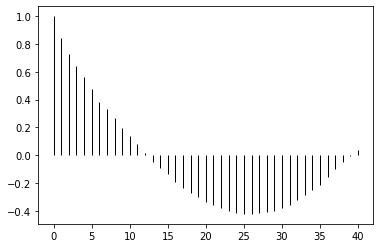

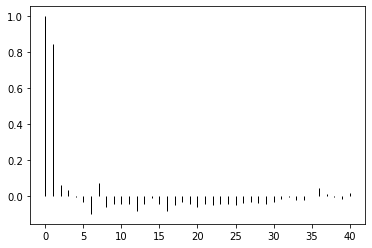

In [ ]:
ytmp = acf(serie, fft=False, missing="drop")
plt.bar(range(len(ytmp)),ytmp, width=0, ec="k")
plt.show()

ytmp = pacf(serie[ii_tmp])
plt.bar(range(len(ytmp)),ytmp, width=0, ec="k")
plt.show()

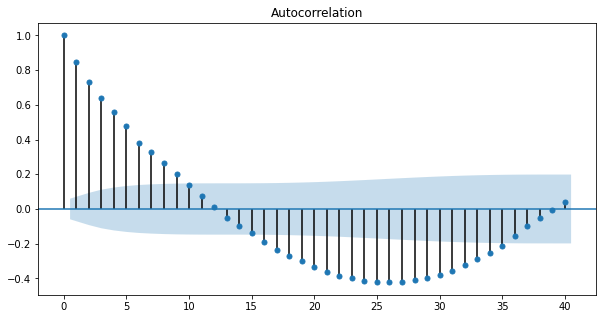

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10,5))
plot_acf(serie.Caudal[ii_tmp], lags=40, ax=ax)
plt.show()

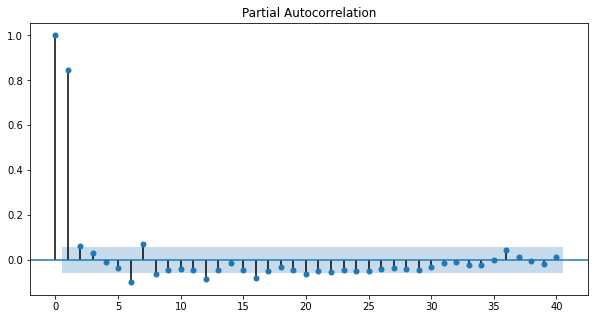

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(serie.Caudal[ii_tmp], lags=40, ax=ax)
plt.show()

In [ ]:
tmp = serie.iloc[0:16].copy()
tmp

,Caudal
0,69.30963
1,59.81791
2,61.95215
3,96.10415
4,253.08719
5,277.08953
6,148.00423
7,448.29453
8,608.40997
9,776.21950


In [ ]:
tmp.values.reshape((8,2))

array([[ 69.30963,  59.81791],
       [ 61.95215,  96.10415],
       [253.08719, 277.08953],
       [148.00423, 448.29453],
       [608.40997, 776.2195 ],
       [476.93049, 338.07581],
       [293.24359, 267.04362],
       [265.13526, 294.54694]])

In [ ]:
nrow , _ = tmp.shape



pd.concat([tmp[0:(nrow-2)].reset_index(drop=True),
           tmp[1:(nrow-1)].reset_index(drop=True),
           tmp[2:nrow].reset_index(drop=True)], axis=1, ignore_index=True)

,0,1,2
0,69.30963,59.81791,61.95215
1,59.81791,61.95215,96.10415
2,61.95215,96.10415,253.08719
3,96.10415,253.08719,277.08953
4,253.08719,277.08953,148.00423
5,277.08953,148.00423,448.29453
6,148.00423,448.29453,608.40997
7,448.29453,608.40997,776.21950
8,608.40997,776.21950,476.93049
9,776.21950,476.93049,338.07581


In [ ]:
nrow , _ = serie.shape
lag = 1+1

XY = serie[0:(nrow-lag+1)].reset_index(drop=True)
for i in range(1,lag):
  XY = pd.concat([XY, serie[i:(nrow-lag+i)].reset_index(drop=True)], axis=1, ignore_index=True)

XY.fillna(0, inplace=True)

XY

,0,1
0,69.30963,59.81791
1,59.81791,61.95215
2,61.95215,96.10415
3,96.10415,253.08719
4,253.08719,277.08953
...,...,...
1082,27.85471,27.98657
1083,27.98657,25.25900
1084,25.25900,25.18557
1085,25.18557,33.12600


In [ ]:
X = XY.iloc[:,0:(lag-1)]
Y = XY.iloc[:,(lag-1)]
X

,0
0,69.30963
1,59.81791
2,61.95215
3,96.10415
4,253.08719
...,...
1082,27.85471
1083,27.98657
1084,25.25900
1085,25.18557


In [ ]:
print(Y)

0        59.81791
1        61.95215
2        96.10415
3       253.08719
4       277.08953
          ...    
1082     27.98657
1083     25.25900
1084     25.18557
1085     33.12600
1086      0.00000
Name: 1, Length: 1087, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)
Xtrain

,0
16,275.31976
517,138.39614
149,121.17768
331,63.98214
718,33.85000
...,...
215,119.41043
122,61.51268
600,36.19557
324,299.06057


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(Xtrain, Ytrain)
Yhat = model1.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

2626.3788909179434
27.366871340797793
0.7146358151001267


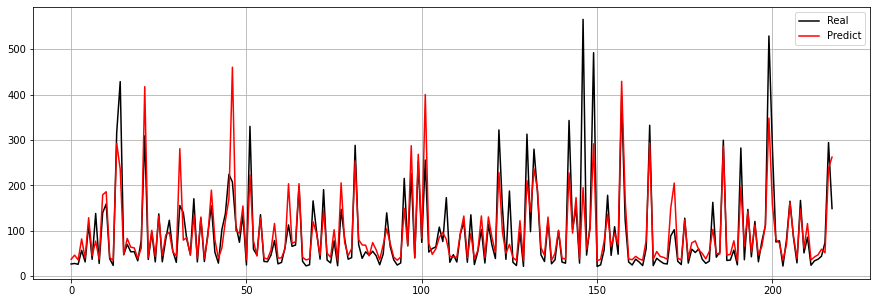

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(Ytest.values, 'k-', label="Real")
plt.plot(Yhat, 'r-', label="Predict")
plt.legend()
plt.grid()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)
Yhat = mo2.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

3189.6362681043734
30.18076208715597
0.6534361599835461


In [ ]:
Yhat2 = mo2.predict(Xtrain)
print(r2_score(Ytrain, Yhat2))

0.9988612632046988


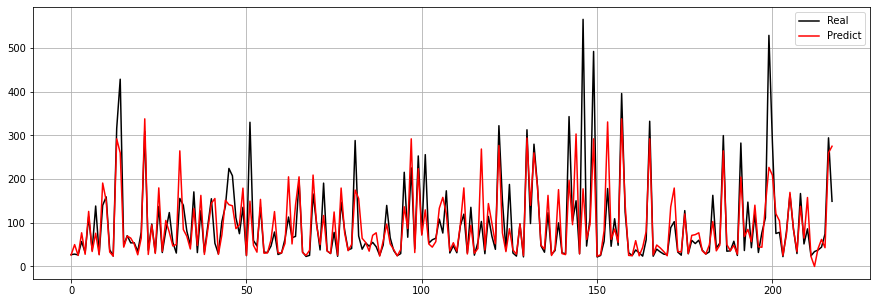

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(Ytest.values, 'k-', label="Real")
plt.plot(Yhat, 'r-', label="Predict")
plt.legend()
plt.grid()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mo2 = DecisionTreeRegressor(max_depth=4, min_samples_split=5)
mo2.fit(Xtrain, Ytrain)
Yhat = mo2.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

2463.617204633618
24.961068533801328
0.7323203754276818


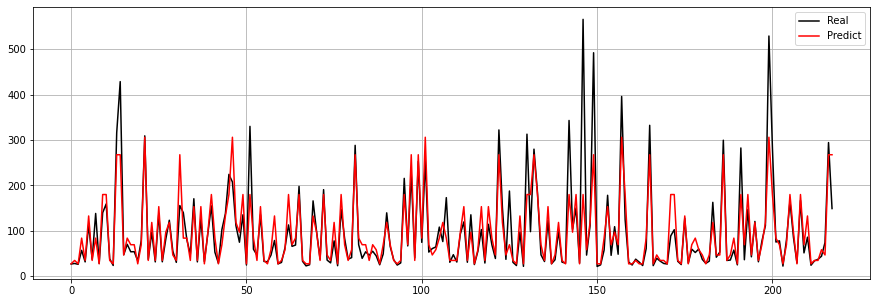

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(Ytest.values, 'k-', label="Real")
plt.plot(Yhat, 'r-', label="Predict")
plt.legend()
plt.grid()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

params = {"n_estimators": [100],
          #"max_depth": [2,3], 
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,8,10,15]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

print(grid.best_score_)
print(grid.best_params_)

0.6947399624773143
{'max_leaf_nodes': 5, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mo3 = RandomForestRegressor(max_leaf_nodes = 15, 
                            min_samples_split = 2,
                            n_estimators = 100)
mo3.fit(Xtrain,Ytrain)
Yhat = mo3.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  2426.65148639783
MAE:  24.716862022871382
R^2:  0.7363368149787578
